<a href="https://colab.research.google.com/github/HuzainAzis/citra/blob/master/5.PraFix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [30]:
terinfeksi_data = os.listdir('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi/')
print(terinfeksi_data[:10]) #the output we get are the .png files

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi/')
print('\n')
print(tidakTerinfeksi_data[:10])

['C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png', 'C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C33P1thinF_IMG_20150619_115740a_cell_163.png', 'C33P1thinF_IMG_20150619_115740a_cell_161.png', 'C33P1thinF_IMG_20150619_115740a_cell_162.png', 'C33P1thinF_IMG_20150619_115808a_cell_206.png', 'C33P1thinF_IMG_20150619_115808a_cell_205.png', 'C33P1thinF_IMG_20150619_120645a_cell_217.png']


['C1_thinF_IMG_20150604_104722_cell_15.png', 'C1_thinF_IMG_20150604_104722_cell_9.png', 'C1_thinF_IMG_20150604_104722_cell_79.png', 'C1_thinF_IMG_20150604_104722_cell_66.png', 'C1_thinF_IMG_20150604_104722_cell_60.png', 'C1_thinF_IMG_20150604_104722_cell_73.png', 'C1_thinF_IMG_20150604_104722_cell_81.png', 'C1_thinF_IMG_20150604_104722_cell_123.png', 'C1_thinF_IMG_20150604_104722_cell_164.png', 'C1_thinF_IMG_20150604_104722_cell_115.png']


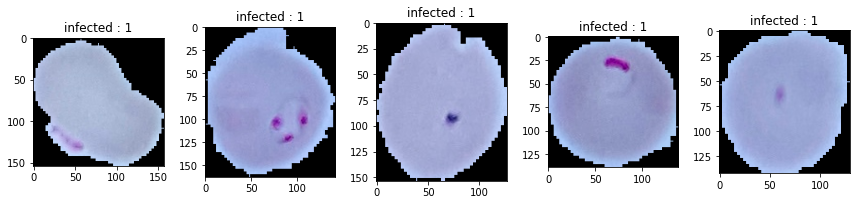

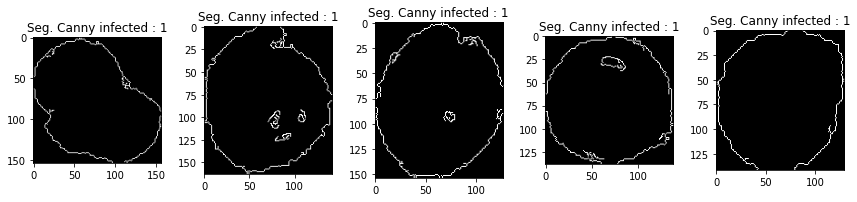

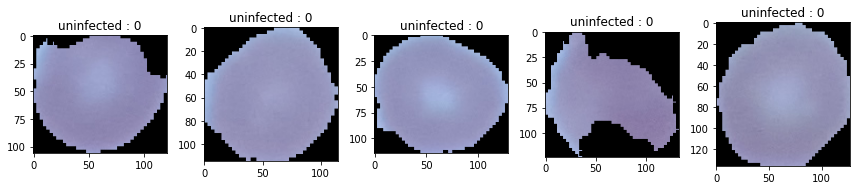

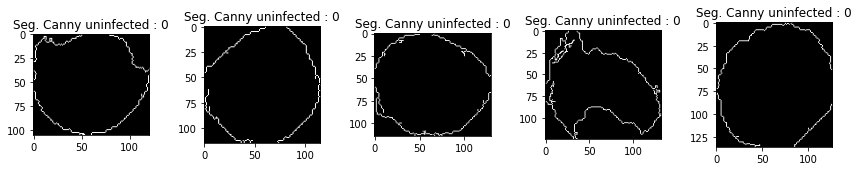

In [51]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

[ 3.62300197e-02  6.46711376e-05  1.28477193e-06  1.90618431e-07
 -8.63211899e-14  1.33866910e-10  3.80425050e-14]
[ 2.31741805e-02  8.21128815e-06  6.96330025e-08  3.19777875e-07
 -2.68690290e-14  1.23976226e-10  3.94340115e-14]
[ 2.98316360e-02  4.36267844e-05  1.56027472e-08  8.14917449e-08
  9.15561257e-16  5.38250438e-10 -2.75782977e-15]
[2.82400075e-02 6.10331718e-06 3.74921355e-07 3.60138914e-07
 8.78894915e-14 4.20443891e-10 9.89344490e-14]
[ 4.22376083e-02  1.39487703e-05  9.10377877e-08  1.50038965e-07
 -1.61920214e-14  3.16718115e-10  6.73130585e-15]


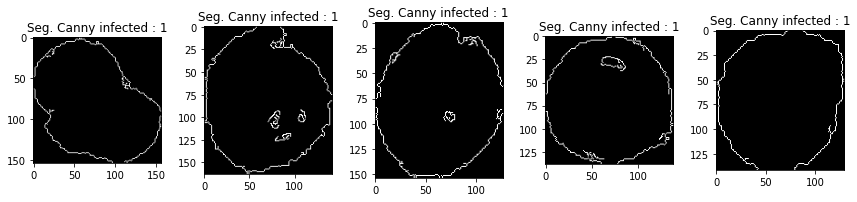

In [59]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/DATA5050/cell_images/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    print(a)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()
plt.show()



In [53]:
a = cv2.HuMoments(cv2.moments(edges)).flatten()
a

array([ 4.22376083e-02,  1.39487703e-05,  9.10377877e-08,  1.50038965e-07,
       -1.61920214e-14,  3.16718115e-10,  6.73130585e-15])

In [0]:
np.savetxt("malariax.csv", a, delimiter=";")

In [25]:
#load dataset
dataset = pd.read_csv('/content/drive/My Drive/dataset/malaria.csv')
print (len(dataset))
#dataset.Type.value_counts().plot(kind='bar')
print (dataset)

6
   3.102253643960519933e-02
0              2.789493e-05
1              8.382779e-07
2              9.928285e-09
3             -8.056674e-16
4              3.297723e-11
5             -4.138501e-16
